In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import json 
import os
import missingno
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def read_all_json(folder_path, state_name):
    df = pd.DataFrame()
    for file in os.listdir(folder_path):
        file_path = f"{folder_path}/{file}"
        f = open(file_path, encoding="utf8")
        data = json.load(f)
        df_1 = pd.json_normalize(data, max_level=2)
        df_1 = df_1.drop(['documentos'], axis=1, errors='ignore')
        df_2 = pd.json_normalize(data, record_path=['tipoSancion'], record_prefix='tipoSancion.')
        df_3 = df_1.join(df_2)
        df_3['estado'] = state_name
        df = pd.concat([df, df_3])
    return df

In [ ]:
def names_std(df):
  df = df.replace('Í','I', regex=True)
  df = df.replace('Ó','O', regex=True)
  df = df.replace('Á','A', regex=True)
  df = df.replace('É','E', regex=True)
  df = df.replace('Ú','U', regex=True)
  df = df.replace('í','i', regex=True)
  df = df.replace('ó','o', regex=True)
  df = df.replace('á','a', regex=True)
  df = df.replace('é','e', regex=True)
  df = df.replace('ú','u', regex=True)
  df = df.replace('ñ','n', regex=True)
  df = df.replace('Ñ','N', regex=True)
  return df

In [ ]:
def name_clean(df):
  df['servidorPublicoSancionado.nombreCompleto'] = df['servidorPublicoSancionado.nombres'] + ' ' + df['servidorPublicoSancionado.primerApellido'] + ' ' + df['servidorPublicoSancionado.segundoApellido']
  df = df.drop(['servidorPublicoSancionado.nombres', 'servidorPublicoSancionado.primerApellido', 'servidorPublicoSancionado.segundoApellido'], axis=1)
  df = df.drop(['expediente', 'resolucion.url', 'servidorPublicoSancionado.genero.valor', 
                        'multa.moneda.valor', 'tipoSancion.valor', 'tipoSancion._id', '__v'], axis=1, errors='ignore')
  return df

In [ ]:
chiapas = read_all_json('/content/drive/MyDrive/Colab Notebooks/dataton_2022/s3s/CHIAPAS', 'CHIAPAS')
chiapas.head(1)

,id,fechaCaptura,expediente,autoridadSancionadora,tipoSancion,causaMotivoHechos,institucionDependencia.nombre,institucionDependencia.siglas,institucionDependencia.clave,servidorPublicoSancionado.nombres,...,resolucion.fechaResolucion,multa.monto,multa.moneda.clave,multa.moneda.valor,inhabilitacion.plazo,inhabilitacion.fechaInicial,inhabilitacion.fechaFinal,tipoSancion.clave,tipoSancion.valor,estado
0,b411f02b-5ea7-489e-93e5-9eca24d090f6,2022-05-06T00:00:00Z,CA/012/2022,DATOS NO PROPORCIONADOS,"[{'clave': 'I', 'valor': 'INHABILITADO'}]",DATOS NO PROPORCIONADOS,Fiscalia General del Estado,FGE,78,ANDRES,...,2022-01-12,0,MXN,PESO MEXICANO,3 MESES,2022-02-15,2022-05-15,I,INHABILITADO,CHIAPAS


In [ ]:
chiapas.columns

Index(['id', 'fechaCaptura', 'expediente', 'autoridadSancionadora',
       'tipoSancion', 'causaMotivoHechos', 'institucionDependencia.nombre',
       'institucionDependencia.siglas', 'institucionDependencia.clave',
       'servidorPublicoSancionado.nombres',
       'servidorPublicoSancionado.primerApellido',
       'servidorPublicoSancionado.segundoApellido',
       'servidorPublicoSancionado.genero.clave',
       'servidorPublicoSancionado.genero.valor',
       'servidorPublicoSancionado.puesto', 'servidorPublicoSancionado.nivel',
       'tipoFalta.clave', 'tipoFalta.valor', 'resolucion.url',
       'resolucion.fechaResolucion', 'multa.monto', 'multa.moneda.clave',
       'multa.moneda.valor', 'inhabilitacion.plazo',
       'inhabilitacion.fechaInicial', 'inhabilitacion.fechaFinal',
       'tipoSancion.clave', 'tipoSancion.valor', 'estado'],
      dtype='object')

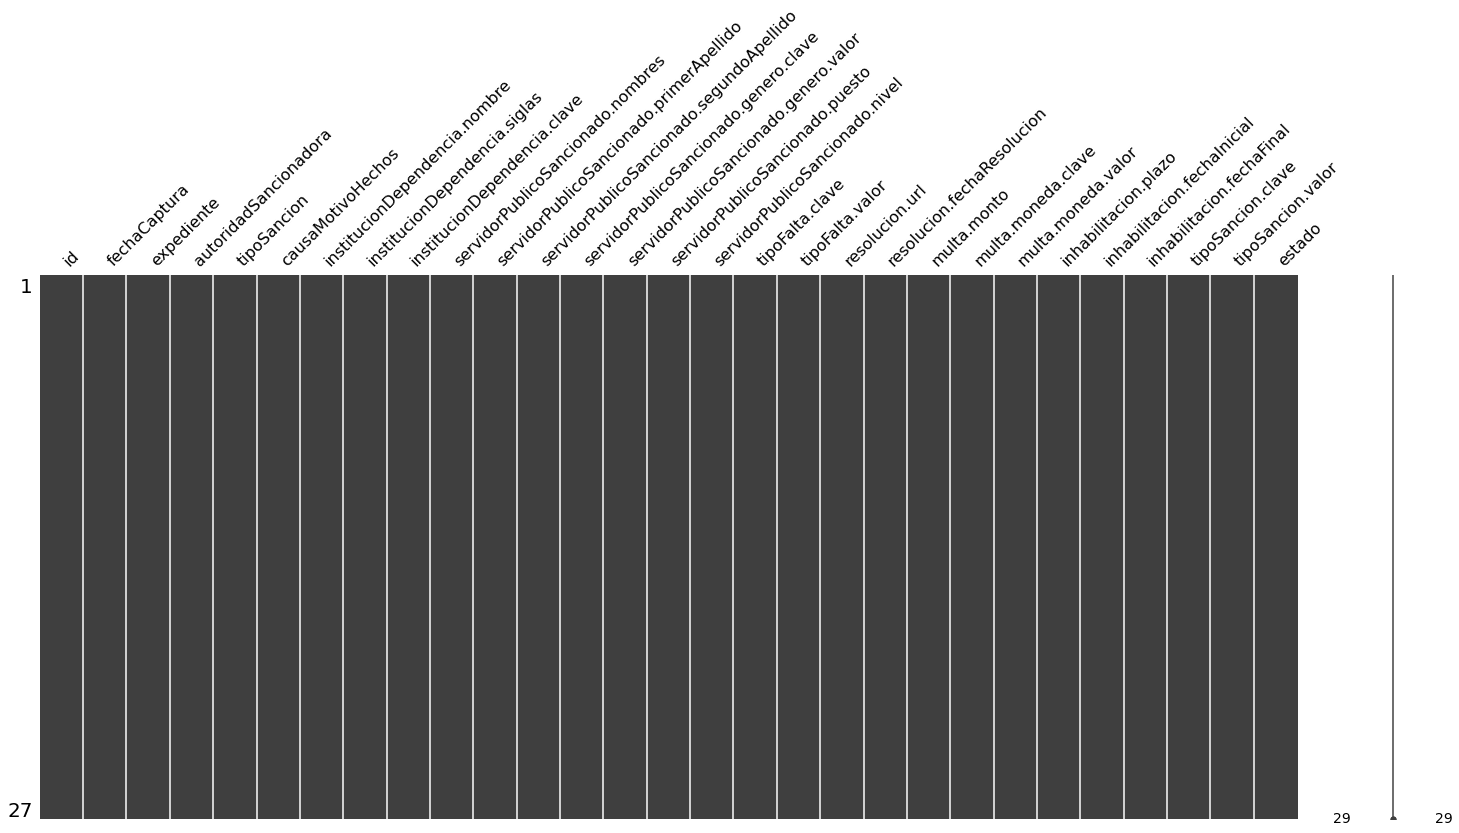

In [ ]:
missingno.matrix(chiapas)

In [ ]:
chiapas = name_clean(chiapas)

In [ ]:
chiapas.shape

(27, 22)

In [ ]:
edomex = read_all_json('/content/drive/MyDrive/Colab Notebooks/dataton_2022/s3s/EDOMEX', 'EDOMEX')
edomex.head(1)

,id,fechaCaptura,expediente,autoridadSancionadora,tipoSancion,causaMotivoHechos,observaciones,institucionDependencia.nombre,institucionDependencia.siglas,institucionDependencia.clave,...,multa.monto,multa.moneda.clave,multa.moneda.valor,inhabilitacion.plazo,inhabilitacion.fechaInicial,inhabilitacion.fechaFinal,tipoSancion.clave,tipoSancion.valor,tipoSancion.descripcion,estado
0,62b5d493a069d2c71acd3b7e,2020-11-09T10:19:56Z,10/2019,NOVENA SALA ESPECIALIZADA EN MATERIA DE RESPON...,"[{'clave': 'I', 'valor': 'INHABILITADO', 'desc...","COHECHO,","EMPLEO, CARGO O COMISIÓN AL MOMENTO DE LA REAL...",FISCALÍA GENERAL DE JUSTICIA DEL ESTADO DE MÉXICO,FGJEM,oau-002,...,0.0,MXN,PESO MEXICANO,0 día(s) 4 mes(es) 4 año(s),NaN,NaN,I,INHABILITADO,INHABILITADO,EDOMEX


In [ ]:
edomex.columns

Index(['id', 'fechaCaptura', 'autoridadSancionadora', 'tipoSancion',
       'causaMotivoHechos', 'observaciones', 'institucionDependencia.nombre',
       'institucionDependencia.siglas', 'institucionDependencia.clave',
       'servidorPublicoSancionado.genero.clave',
       'servidorPublicoSancionado.puesto', 'tipoFalta.clave',
       'tipoFalta.valor', 'tipoFalta.descripcion',
       'resolucion.fechaResolucion', 'multa.monto', 'multa.moneda.clave',
       'inhabilitacion.plazo', 'inhabilitacion.fechaInicial',
       'inhabilitacion.fechaFinal', 'tipoSancion.clave',
       'tipoSancion.descripcion', 'estado',
       'servidorPublicoSancionado.nombreCompleto'],
      dtype='object')

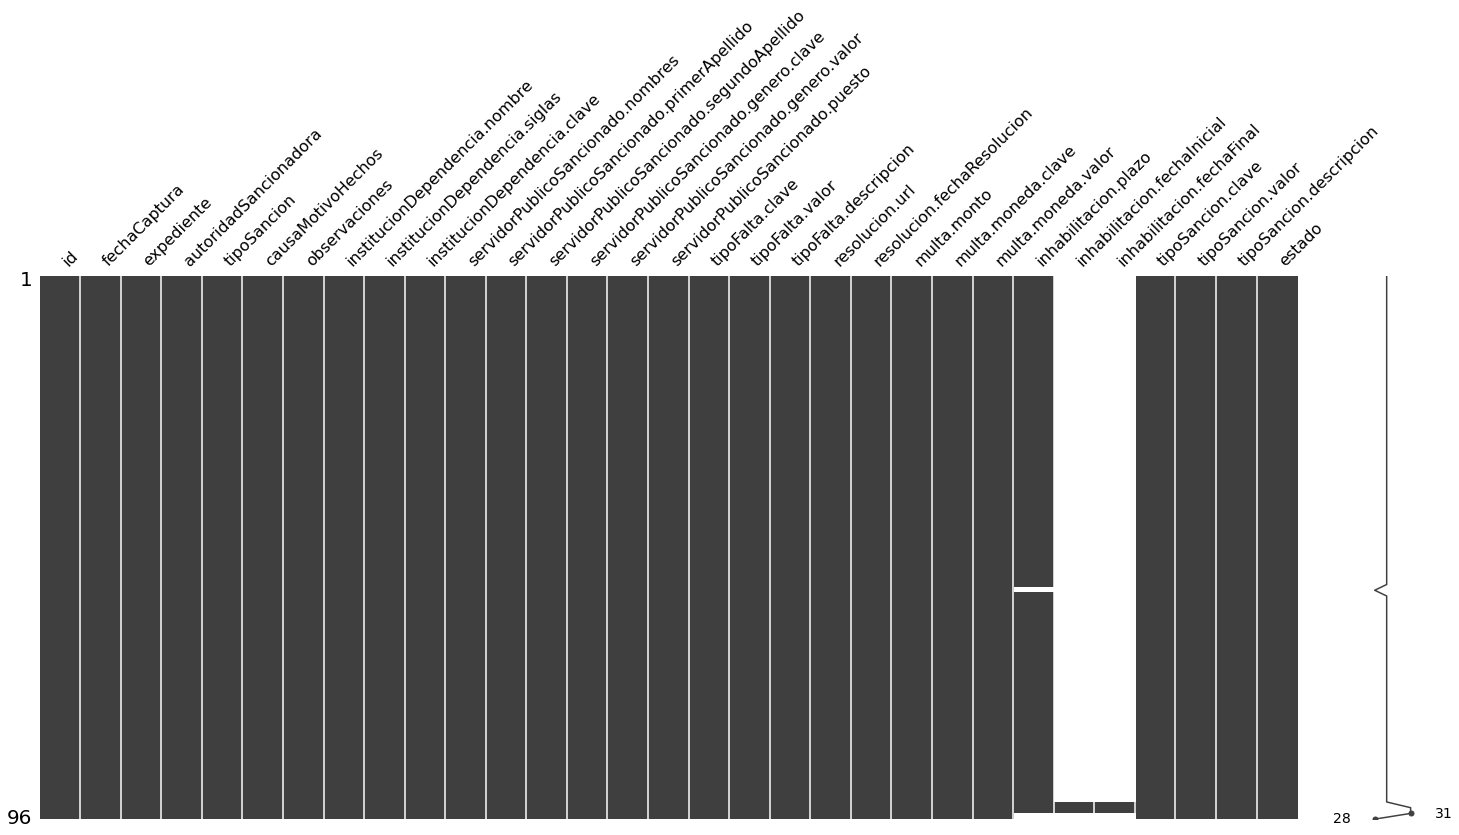

In [ ]:
missingno.matrix(edomex)

In [ ]:
edomex = name_clean(edomex)

In [ ]:
edomex.shape

(96, 24)

In [ ]:
edomex = names_std(edomex)
chiapas = names_std(chiapas)

### EDA

In [ ]:
chiapas['autoridadSancionadora'].value_counts()

DATOS NO PROPORCIONADOS    27
Name: autoridadSancionadora, dtype: int64

In [ ]:
edomex['autoridadSancionadora'].value_counts()

NOVENA SALA ESPECIALIZADA EN MATERIA DE RESPONSABILIDADES ADMINISTRATIVAS    83
OCTAVA SALA ESPECIALIZADA EN MATERIA DE RESPONSABILIDADES ADMINISTRATIVAS    13
Name: autoridadSancionadora, dtype: int64

In [ ]:
chiapas['institucionDependencia.nombre'].value_counts()

Fiscalia General del Estado                                                                      7
Comisión de Caminos e Infraestructura Hidráulica                                                 4
Secretaría de Hacienda                                                                           3
Instituto de Elecciones y Participación Ciudadana                                                2
Secretaría de Obras Públicas                                                                     2
Instituto de la Infraestructura Física Educativa del Estado de Chiapas                           2
Secretaría de Agricultura, Ganadería y Pesca                                                     2
Secretaría de Bienestar                                                                          1
Régimen Estatal de Protección Social en Salud                                                    1
Instituto de Capacitación y Vinculación Tecnológica del Estado de Chiapas                        1
Instituto 

In [ ]:
chiapas['servidorPublicoSancionado.nivel'].value_counts()

DATOS NO PROPORCIONADOS    27
Name: servidorPublicoSancionado.nivel, dtype: int64

In [ ]:
chiapas[['institucionDependencia.nombre', 'servidorPublicoSancionado.puesto']].groupby(['institucionDependencia.nombre','servidorPublicoSancionado.puesto']).count()

Empty DataFrame
Columns: []
Index: [(Comision de Caminos e Infraestructura Hidraulica, DIRECTOR DE SUPERVISION DE INFRAESTRUCTURA HIDRAULICA), (Comision de Caminos e Infraestructura Hidraulica, DIRECTORA DE CONTRATOS Y ESTIMACIONES), (Comision de Caminos e Infraestructura Hidraulica, JEFE DE LA UNIDAD APOYO ADMINISTRATIVO), (Comision de Caminos e Infraestructura Hidraulica, SUPERVISOR DE OBRA), (Fiscalia General del Estado, ANALISTA TECNICO), (Fiscalia General del Estado, AUXILIAR DE SEGURIDAD D), (Fiscalia General del Estado, FISCAL DEL MINISTERIO PUBLICO, ADSCRITO A LA FISCALIA DE DISTRITO NORTE), (Fiscalia General del Estado, FISCAL DEL MINISTERIO PUBLICO, ADSCRITO A LA FISCALIA DE LA MUJER), (Fiscalia General del Estado, GESTOR ADMINISTRATIVO), (Fiscalia General del Estado, SECRETARIA DE ACUERDOS MINISTERIALES, ADSCRITA A LA FISCALIA DE DISTRITO FRONTERIZO COSTA), (Fiscalia General del Estado, SECRETARIA EJECUTIVA DE APOYO, ADSCRITA A LA FISCALIA DE DISTRITO METROPOLITANO), (Instituto Tecnologico Superior de Cintalapa, SUBDIRECTOR DE VINCULACION), (Instituto de Capacitacion y Vinculacion Tecnologica del Estado de Chiapas, JEFE DE DEPARTAMENTO), (Instituto de Elecciones y Participacion Ciudadana, PRESIDENTE DEL CONSEJO MUNICIPAL ELECTORAL DE MAZATAN, CHIAPAS), (Instituto de Elecciones y Participacion Ciudadana, SECRETARIO TECNICO DEL CONSEJO MUNICIPAL ELECTORAL DE MAZATAN, CHIAPAS), (Instituto de la Infraestructura Fisica Educativa del Estado de Chiapas, ENLACE B), (Instituto de la Infraestructura Fisica Educativa del Estado de Chiapas, JEFE DE LA UNIDAD DE APOYO ADMINISTRATIVO), (Regimen Estatal de Proteccion Social en Salud, AUXILIAR ADMINISTRATIVO (APOYO ADMINISTRATIVO EN SALUD A5)), (Secretaria de Agricultura, Ganaderia y Pesca, SUBSECRETARIO DE RECOVERSION PRODUCTIVA SUSTENTABLE), (Secretaria de Agricultura, Ganaderia y Pesca, TITULAR DE LA DELEGACION III FROTERIZA, COMITAN), (Secretaria de Bienestar, JEFA DE DEPARTAMENTO DE GESTION SOCIAL), (Secretaria de Hacienda, DIRECTOR DE CONTROL FINANCIERO), (Secretaria de Hacienda, OPERADOR DEL MODULO DE GOBIERNO EXPRESS SAN CRISTOBAL II, ADSCRITO A LA DELEGACION DE HACIENDA SAN CRISTOBAL DELAS CASAS), (Secretaria de Hacienda, RESPONSABLE DEL CENTRO DE RECAUDACION LOCAL TUXTLA I TORRE CHIAPAS), (Secretaria de Obras Publicas, DIRECTORA DE RECURSOS HUMANOS Y ORGANIZACION), (Secretaria de Obras Publicas, JEFE DE AREA DE ASUNTOS ADMINISTRATIVOS), (Sistema para el Desarrollo Integral de la Familia del Estado de Chiapas (SISTEMA DIF CHIAPAS), AUXILIAR DE EDUCADORA)]

In [ ]:
edomex[['institucionDependencia.nombre', 'servidorPublicoSancionado.puesto']].groupby(['institucionDependencia.nombre','servidorPublicoSancionado.puesto']).count()

Empty DataFrame
Columns: []
Index: [(ATIZAPAN DE ZARAGOZA, Analista Auxiliar), (ATIZAPAN DE ZARAGOZA, JEFE DE DEPARTAMENTO), (ATIZAPAN DE ZARAGOZA, Medica,o Veterinaria,o  ), (ATIZAPAN DE ZARAGOZA, Oficinista), (COACALCO DE BERRIOZABAL, Agente del Ministerio Publico Auxiliar de la Fiscalia), (CUAUTITLAN, Asesora,or Juridica,o Especializada,o), (CUAUTITLAN, JEFE DE UNIDAD), (CUAUTITLAN IZCALLI, Controlista Pagadora,or de Caja General), (ECATEPEC DE MORELOS, Analista Auxiliar), (ECATEPEC DE MORELOS, SUBDIRECTOR), (FISCALIA GENERAL DE JUSTICIA DEL ESTADO DE MEXICO, Agente Investigadora,or R-1), (FISCALIA GENERAL DE JUSTICIA DEL ESTADO DE MEXICO, Agente Investigadora,or R-3), (FISCALIA GENERAL DE JUSTICIA DEL ESTADO DE MEXICO, Agente del Ministerio Publico Auxiliar de la Fiscalia), (FISCALIA GENERAL DE JUSTICIA DEL ESTADO DE MEXICO, Agente del Ministerio Publico R-1), (FISCALIA GENERAL DE JUSTICIA DEL ESTADO DE MEXICO, Agente del Ministerio Publico R-2), (FISCALIA GENERAL DE JUSTICIA DEL ESTADO DE MEXICO, Jefa,e de Departamento ), (FISCALIA GENERAL DE JUSTICIA DEL ESTADO DE MEXICO, Secretaria,o del Ministerio Publico R-1), (FISCALIA GENERAL DE JUSTICIA DEL ESTADO DE MEXICO, Secretaria,o del Ministerio Publico R-2), (HUEYPOXTLA, PRESIDENTE MUNICIPAL CONSTITUCIONAL), (HUEYPOXTLA, SINDICO), (HUEYPOXTLA, TESORERO MUNICIPAL), (INSTITUTO ELECTORAL DEL ESTADO DE MEXICO, Analista Auxiliar), (INSTITUTO ELECTORAL DEL ESTADO DE MEXICO, Auxiliar Administrativa,o de Oficina de Servidora,or Publica,o Superiora,or), (INSTITUTO ELECTORAL DEL ESTADO DE MEXICO, CONSEJERO JURIDICO), (INSTITUTO ELECTORAL DEL ESTADO DE MEXICO, Comisionada,o Ejecutiva,o), (INSTITUTO ELECTORAL DEL ESTADO DE MEXICO, Enlace Administrativa,o), (INSTITUTO ELECTORAL DEL ESTADO DE MEXICO, Promotora,or de Organizacion de Productoras,es), (JALTENCO, DIRECTOR), (JALTENCO, DIRECTOR DE AREA), (JUCHITEPEC, REGIDOR), (NAUCALPAN, Auxiliar Administrativa,o), (NAUCALPAN, ENCARGADO DEL DESPACHO), (NAUCALPAN, SUBDIRECTOR), (NEZAHUALCOYOTL, COORDINADOR), (NEZAHUALCOYOTL, JEFE DE DEPARTAMENTO), (NEZAHUALCOYOTL, Supervisora,or Especializada,o de Servicio Tecnico), (NEZAHUALCOYOTL, Supervisora,or de Captura), (NOPALTEPEC, PRESIDENTE MUNICIPAL CONSTITUCIONAL), (NOPALTEPEC, Residente Regional de Obras Publicas), (NOPALTEPEC, SINDICO), (NOPALTEPEC, TESORERO MUNICIPAL), (ORGANISMO PUBLICO DESCENTRALIZADO PARA LA PRESTACION DE LOS SERVICIOS DE AGUA POTABLE, ALCANTARILLADO Y SANEAMIENTO DE ATIZAPAN DE ZARAGOZA, POR SUS SIGLAS S.A.P.A.S.A., AUXILIAR OPERATIVO), (ORGANISMO PUBLICO DESCENTRALIZADO PARA LA PRESTACION DE LOS SERVICIOS DE AGUA POTABLE, ALCANTARILLADO Y SANEAMIENTO DE ATIZAPAN DE ZARAGOZA, POR SUS SIGLAS S.A.P.A.S.A., Auxiliar Administrativa,o), (ORGANISMO PUBLICO DESCENTRALIZADO PARA LA PRESTACION DE LOS SERVICIOS DE AGUA POTABLE, ALCANTARILLADO Y SANEAMIENTO DE ATIZAPAN DE ZARAGOZA, POR SUS SIGLAS S.A.P.A.S.A., CONTRALOR), (ORGANISMO PUBLICO DESCENTRALIZADO PARA LA PRESTACION DE LOS SERVICIOS DE AGUA POTABLE, ALCANTARILLADO Y SANEAMIENTO DE ATIZAPAN DE ZARAGOZA, POR SUS SIGLAS S.A.P.A.S.A., JEFE DE DEPARTAMENTO), (ORGANISMO PUBLICO DESCENTRALIZADO PARA LA PRESTACION DE LOS SERVICIOS DE AGUA POTABLE, ALCANTARILLADO Y SANEAMIENTO DE ATIZAPAN DE ZARAGOZA, POR SUS SIGLAS S.A.P.A.S.A., Titular del Organo Interno de Control ), (ORGANISMO PUBLICO DESCENTRALIZADO PARA LA PRESTACION DE LOS SERVICIOS DE AGUA POTABLE, ALCANTARILLADO Y SANEAMIENTO DEL MUNICIPIO DE LA PAZ, MEXICO, 'OPDAPAS', Supervisora,or de Servicios), (ORGANISMO PUBLICO DESCENTRALIZADO PARA LA PRESTACION DE SERVICIOS DE AGUA POTABLE, ALCANTARILLADO Y SANEAMIENTO DE COACALCO DE BERRIOZABAL, JEFE DE DEPARTAMENTO C), (OTZOLOTEPEC, PRESIDENTE), (OTZOLOTEPEC, TESORERO MUNICIPAL), (PAPALOTLA, PRESIDENTE), (PAPALOTLA, SINDICO), (PAPALOTLA, TESORERO MUNICIPAL), (SISTEMA DE AGUA POTABLE, ALCANTARILLADO Y SANEAMIENTO DE ECATEPEC DE MORELOS, Auxiliar Administrativa,o), (SISTEMA DE AGUA POTABLE, ALCANTARILLADO Y SANEAMIENTO DE ECATEPEC DE M

In [ ]:
edomex['institucionDependencia.nombre'].value_counts()

FISCALÍA GENERAL DE JUSTICIA DEL ESTADO DE MÉXICO                                                                                                                           16
INSTITUTO ELECTORAL DEL ESTADO DE MÉXICO                                                                                                                                     6
NEZAHUALCÓYOTL                                                                                                                                                               6
TEQUIXQUIAC                                                                                                                                                                  5
ORGANISMO PÚBLICO DESCENTRALIZADO PARA LA PRESTACIÓN DE LOS SERVICIOS DE AGUA POTABLE, ALCANTARILLADO Y SANEAMIENTO DE ATIZAPÁN DE ZARAGOZA, POR SUS SIGLAS S.A.P.A.S.A.     5
TONANITLA                                                                                                                    

In [ ]:
chiapas['tipoFalta.valor'].value_counts()

OTRO    27
Name: tipoFalta.valor, dtype: int64

In [ ]:
edomex.columns

Index(['id', 'fechaCaptura', 'autoridadSancionadora', 'tipoSancion',
       'causaMotivoHechos', 'observaciones', 'institucionDependencia.nombre',
       'institucionDependencia.siglas', 'institucionDependencia.clave',
       'servidorPublicoSancionado.genero.clave',
       'servidorPublicoSancionado.puesto', 'tipoFalta.clave',
       'tipoFalta.valor', 'tipoFalta.descripcion',
       'resolucion.fechaResolucion', 'multa.monto', 'multa.moneda.clave',
       'inhabilitacion.plazo', 'inhabilitacion.fechaInicial',
       'inhabilitacion.fechaFinal', 'tipoSancion.clave',
       'tipoSancion.descripcion', 'estado',
       'servidorPublicoSancionado.nombreCompleto'],
      dtype='object')

In [ ]:
edomex['tipoFalta.valor'].value_counts()

ADMINISTRATIVA GRAVE    96
Name: tipoFalta.valor, dtype: int64

In [ ]:
edomex['tipoFalta.descripcion'].value_counts()

ABUSO DE FUNCIONES,                                      50
COHECHO,                                                 23
DESVIO DE RECURSOS PUBLICOS,                             10
COMETER O TOLERAR CONDUCTAS DE ACOSO SEXUAL,              3
COMETER O TOLERAR CONDUCTAS DE HOSTIGAMIENTO SEXUAL,      3
ACTUAR BAJO CONFLICTO DE INTERES,                         2
PECULADO,                                                 2
DESVIO DE RECURSOS PUBLICOS, ABUSO DE FUNCIONES,          1
PECULADO, ABUSO DE FUNCIONES,                             1
ABUSO DE FUNCIONES, COHECHO,                              1
Name: tipoFalta.descripcion, dtype: int64

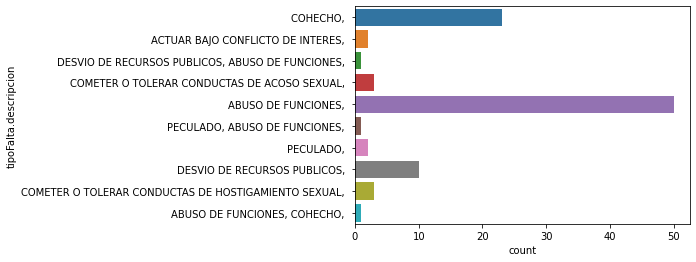

In [ ]:
sns.countplot(data=edomex, y='tipoFalta.descripcion')

In [ ]:
chiapas['tipoSancion.clave'].value_counts()

I    27
Name: tipoSancion.clave, dtype: int64

In [ ]:
edomex['tipoSancion.clave'].value_counts()

I       47
IRSC    17
S       16
D       10
SE       6
Name: tipoSancion.clave, dtype: int64

In [ ]:
chiapas['servidorPublicoSancionado.puesto'].value_counts()

FISCAL DEL MINISTERIO PUBLICO, ADSCRITO A LA FISCALIA DE LA MUJER                                                           1
JEFE DE AREA DE ASUNTOS ADMINISTRATIVOS                                                                                     1
SUBSECRETARIO DE RECOVERSION PRODUCTIVA SUSTENTABLE                                                                         1
RESPONSABLE DEL CENTRO DE RECAUDACION LOCAL TUXTLA I TORRE CHIAPAS                                                          1
JEFE DE LA UNIDAD APOYO ADMINISTRATIVO                                                                                      1
AUXILIAR DE EDUCADORA                                                                                                       1
DIRECTORA DE CONTRATOS Y ESTIMACIONES                                                                                       1
TITULAR DE LA DELEGACION III FROTERIZA, COMITAN                                                                       

In [ ]:
edomex['servidorPublicoSancionado.puesto'].value_counts()

TESORERO MUNICIPAL                                                             11
PRESIDENTE                                                                      7
Secretaria,o del Ministerio Público R-1                                         4
Auxiliar Administrativa,o                                                       4
Agente del Ministerio Público Auxiliar de la Fiscalía                           4
JEFE DE UNIDAD                                                                  4
SINDICO                                                                         4
JEFE DE DEPARTAMENTO                                                            4
Agente del Ministerio Público R-1                                               3
DIRECTOR                                                                        3
SUBDIRECTOR                                                                     3
COORDINADOR                                                                     3
PRESIDENTE MUNIC

In [ ]:
chiapas['servidorPublicoSancionado.genero.clave'].value_counts()

M    23
F     4
Name: servidorPublicoSancionado.genero.clave, dtype: int64

In [ ]:
edomex['servidorPublicoSancionado.genero.clave'].value_counts()

M    65
F    31
Name: servidorPublicoSancionado.genero.clave, dtype: int64

In [ ]:
chiapas['multa.monto'].mean()

0.0

In [ ]:
chiapas['multa.monto'].unique()

array([0])

In [ ]:
edomex['multa.monto'].mean()

113741.205625

In [ ]:
import seaborn as sns

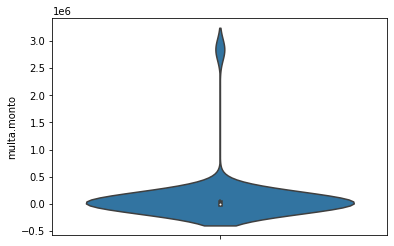

In [ ]:
sns.violinplot(data=edomex, y='multa.monto')

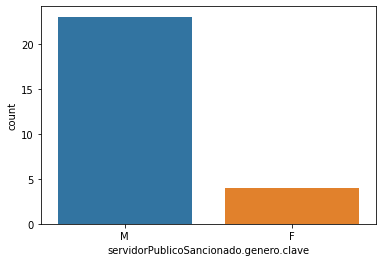

In [ ]:
sns.countplot(data=chiapas, x='servidorPublicoSancionado.genero.clave')

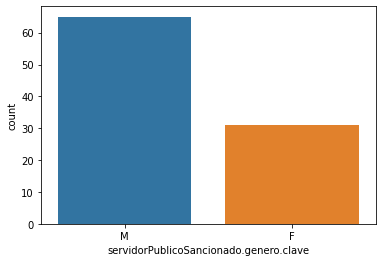

In [ ]:
sns.countplot(data=edomex, x='servidorPublicoSancionado.genero.clave')

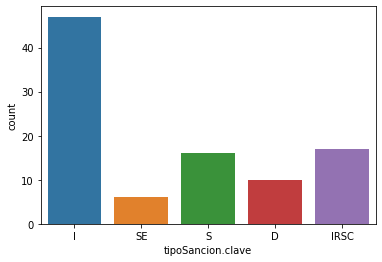

In [ ]:
sns.countplot(data=edomex, x='tipoSancion.clave')

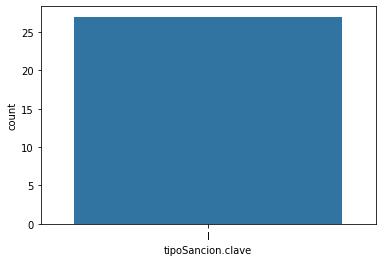

In [ ]:
sns.countplot(data=chiapas, x='tipoSancion.clave')

In [ ]:
chiapas.to_csv('/content/drive/MyDrive/Colab Notebooks/dataton_2022/S3_chiapas.csv', encoding='utf-8', index=False)

In [ ]:
edomex.to_csv('/content/drive/MyDrive/Colab Notebooks/dataton_2022/S3_edomex.csv', encoding='utf-8', index=False)